<a href="https://colab.research.google.com/github/khinkhinkhant112316/Code-Lab-channel/blob/main/corn_leaf_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import libraries
import warnings
warnings.simplefilter(action='ignore')
import os
import zipfile
from shutil import copyfile
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Load the dataset
*   Load and extract the dataset
*   Create train and test files
*   Split and assign the data into train,validation and test folder
*   Display some images








In [1]:
## Conection with Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Load and extract the dataset
input_path = "/content/drive/MyDrive/Dataset/Corn_Leaf_Disease.ZIP"

local_zip = input_path
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Dataset')
zip_ref.close()

NameError: name 'zipfile' is not defined

In [3]:
import zipfile

# Assuming input_path is defined earlier in your script
local_zip = input_path
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Dataset')
zip_ref.close()


In [11]:
import os
extrac_path = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease'
subfolder_name = 'Blight'  # Replace with the desired subfolder name
data_path = os.path.join(extrac_path, 'data')  # Path to the data subfolder

if not os.path.exists(data_path):
    os.makedirs(data_path)  # Create the data subfolder if it doesn't exist

subfolder_path = os.path.join(data_path, subfolder_name)

try:
    os.mkdir(subfolder_path)
    print(f"Subfolder '{subfolder_name}' created successfully in the 'data' directory.")
except FileExistsError:
    print(f"Subfolder '{subfolder_name}' already exists in the 'data' directory.")


Subfolder 'Blight' created successfully in the 'data' directory.


In [12]:
import os
extrac_path = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease'
subfolder_name = 'Common_Rust'  # Replace with the desired subfolder name
data_path = os.path.join(extrac_path, 'data')  # Path to the data subfolder

if not os.path.exists(data_path):
    os.makedirs(data_path)  # Create the data subfolder if it doesn't exist

subfolder_path = os.path.join(data_path, subfolder_name)

try:
    os.mkdir(subfolder_path)
    print(f"Subfolder '{subfolder_name}' created successfully in the 'data' directory.")
except FileExistsError:
    print(f"Subfolder '{subfolder_name}' already exists in the 'data' directory.")

Subfolder 'Common_Rust' created successfully in the 'data' directory.


In [13]:
import os
extrac_path = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease'
subfolder_name = 'Gray_Leaf_Spot'  # Replace with the desired subfolder name
data_path = os.path.join(extrac_path, 'data')  # Path to the data subfolder

if not os.path.exists(data_path):
    os.makedirs(data_path)  # Create the data subfolder if it doesn't exist

subfolder_path = os.path.join(data_path, subfolder_name)

try:
    os.mkdir(subfolder_path)
    print(f"Subfolder '{subfolder_name}' created successfully in the 'data' directory.")
except FileExistsError:
    print(f"Subfolder '{subfolder_name}' already exists in the 'data' directory.")

Subfolder 'Gray_Leaf_Spot' created successfully in the 'data' directory.


In [14]:
import os
extrac_path = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease'
subfolder_name = 'Healthy'  # Replace with the desired subfolder name
data_path = os.path.join(extrac_path, 'data')  # Path to the data subfolder

if not os.path.exists(data_path):
    os.makedirs(data_path)  # Create the data subfolder if it doesn't exist

subfolder_path = os.path.join(data_path, subfolder_name)

try:
    os.mkdir(subfolder_path)
    print(f"Subfolder '{subfolder_name}' created successfully in the 'data' directory.")
except FileExistsError:
    print(f"Subfolder '{subfolder_name}' already exists in the 'data' directory.")

Subfolder 'Healthy' created successfully in the 'data' directory.


In [16]:
extrac_path = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/data'

for set_ in ['data']:
    n_blight = len(os.listdir(extrac_path+set_ + '/Blight'))
    n_common_rust = len(os.listdir(extrac_path+set_ + '/Common_Rust'))
    n_gray_leaf_spot = len(os.listdir(extrac_path+set_ + '/Gray_Leaf_Spot'))
    n_health = len(os.listdir(extrac_path+set_ + '/Healthy'))
    print('blight images: {}, common rust images: {}, gray leaf spot images: {}, healt images:{}'.format(n_blight,
                                                                                                         n_common_rust,
                                                                                                         n_gray_leaf_spot,
                                                                                                         n_health))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/datadata/Blight'

In [17]:
##Create train and test files
try:
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Blight')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Common_Rust')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Healthy')

    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Blight')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Common_Rust')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Healthy')

    os.mkdir('/content/drive/MyDrive/Plant_Village_Dataset_Corn/Leaf_Disease/test')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Blight')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Common_Rust')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Healthy')
except OSError:
    print(file)

NameError: name 'file' is not defined

In [18]:
import os

try:
    # Creating directories for training data
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Blight')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Common_Rust')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Healthy')

    # Creating directories for validation data
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Blight')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Common_Rust')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Healthy')

    # Creating directories for testing data
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Blight')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Common_Rust')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Healthy')
except OSError as e:
    print("Creation of directories failed:", e)


In [19]:
#Split and assign the data into train and test files(80:20)
def split_data(SOURCE, TRAINING, VALIDATION, TESTING):

    all_files = []

    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))

    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    shuffled = random.sample(all_files, n_files)

    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]

    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)

    for file_name in val_set:
        copyfile(SOURCE + file_name, VALIDATION + file_name)

    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

Blight_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Blight'
Common_Rust_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Common_Rust'
Gray_Leaf_Spot_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Gray_Leaf_Spot'
Healthy_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Healthy'

TRAINING_Blight_DIR = '/content/drive/MyDrive/Plant_Village_Dataset_Corn/Leaf_Disease/train/Blight/'
TRAINING_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Healthy/'

VALIDATION_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Blight/'
VALIDATION_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Healthy/'

TESTING_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Blight/'
TESTING_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Healthy/'


split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR,TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR,TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/BlightCorn___Northern_Leaf_Blight'

In [21]:
import os
import random
from shutil import copyfile
#Split and assign the data into train and test files(80:20)
def split_data(SOURCE, TRAINING, VALIDATION, TESTING):

    all_files = []

    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))

    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    shuffled = random.sample(all_files, n_files)

    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]

    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)

    for file_name in val_set:
        copyfile(SOURCE + file_name, VALIDATION + file_name)

    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

Blight_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Blight'
Common_Rust_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Common_Rust'
Gray_Leaf_Spot_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Gray_Leaf_Spot'
Healthy_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Healthy'

TRAINING_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Blight/'
TRAINING_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Healthy/'

VALIDATION_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Blight/'
VALIDATION_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Healthy/'

TESTING_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Blight/'
TESTING_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Healthy/'


split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR,TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR,TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/BlightCorn___Northern_Leaf_Blight'

In [22]:
import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, VALIDATION, TESTING):
    # Check if destination directories exist, if not, create them
    for dir_path in [TRAINING, VALIDATION, TESTING]:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

    all_files = []

    # Loop through files in the source directory
    for file_name in os.listdir(SOURCE):
        file_path = os.path.join(SOURCE, file_name)

        # Check if file is not empty
        if os.path.getsize(file_path) > 0:
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))

    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    # Shuffle the files randomly
    shuffled = random.sample(all_files, n_files)

    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]

    # Copy files to training directory
    for file_name in train_set:
        copyfile(os.path.join(SOURCE, file_name), os.path.join(TRAINING, file_name))

    # Copy files to validation directory
    for file_name in val_set:
        copyfile(os.path.join(SOURCE, file_name), os.path.join(VALIDATION, file_name))

    # Copy files to testing directory
    for file_name in test_set:
        copyfile(os.path.join(SOURCE, file_name), os.path.join(TESTING, file_name))

# Define your source and destination directories
Blight_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Blight/'
Common_Rust_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Common_Rust/'
Gray_Leaf_Spot_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Gray_Leaf_Spot/'
Healthy_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Healthy/'

TRAINING_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Blight/'
TRAINING_Common_Rust_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Healthy/'

VALIDATION_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Blight/'
VALIDATION_Common_Rust_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Healthy/'

TESTING_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Blight/'
TESTING_Common_Rust_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Healthy/'

# Split data for each category
split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR, TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR, TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Blight/Corn___Northern_Leaf_Blight'

In [25]:
import os
import random
from shutil import copyfile
#Split and assign the data into train and test files(80:20)
def split_data(SOURCE, TRAINING, VALIDATION, TESTING):

    all_files = []

    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))

    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    shuffled = random.sample(all_files, n_files)

    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]

    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)

    for file_name in val_set:
        copyfile(SOURCE + file_name, VALIDATION + file_name)

    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

Blight_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Blight/Corn___Northern_Leaf_Blight/'
Common_Rust_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Common_Rust/Corn___Common_rust/'
Gray_Leaf_Spot_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Gray_Leaf_Spot/Corn___Cercospora_leaf_spot Gray_leaf_spot/'
Healthy_SOURCE_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/Healthy/Corn___healthy/'

TRAINING_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Blight/'
TRAINING_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/train/Healthy/'

VALIDATION_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Blight/'
VALIDATION_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/val/Healthy/'

TESTING_Blight_DIR = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Blight/'
TESTING_Common_Rust_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR ='/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/test/Healthy/'


split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR,TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR,TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)

Display some images

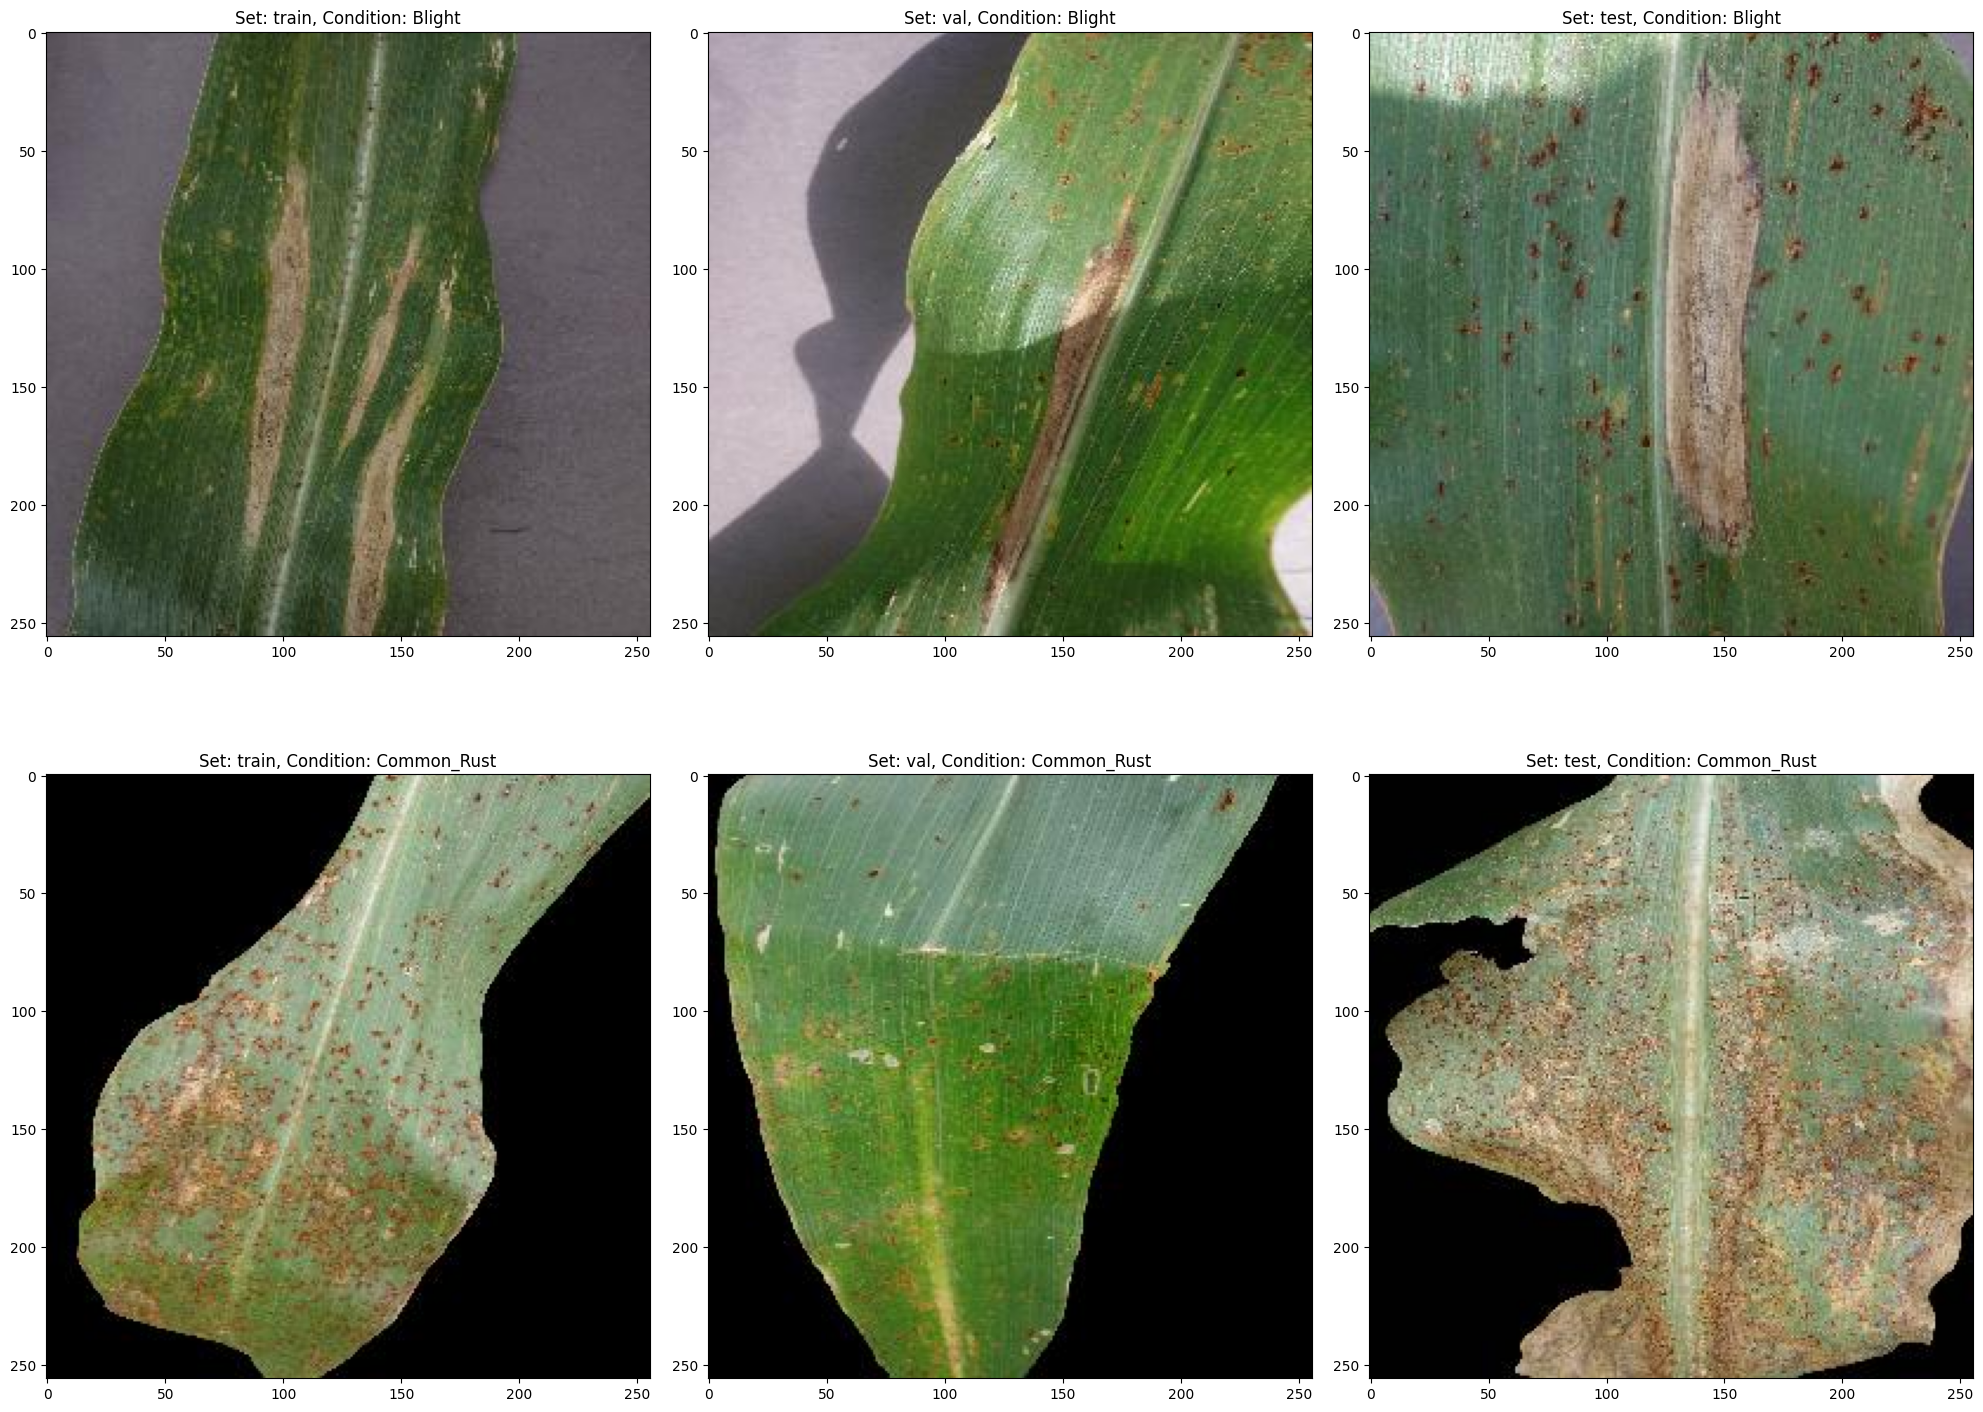

In [29]:
##
import matplotlib.pyplot as plt

path_ = '/content/drive/MyDrive/Dataset/Corn_Leaf_Disease/'

fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()

for i, set_ in enumerate(['train','val', 'test']):
    set_path = path_+ set_
    ax[i].imshow(plt.imread(set_path+'/Blight/'+os.listdir(set_path+'/Blight')[0]))
    ax[i].set_title('Set: {}, Condition: Blight'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Common_Rust/'+os.listdir(set_path+'/Common_Rust')[0]))
    ax[i+3].set_title('Set: {}, Condition: Common_Rust'.format(set_))

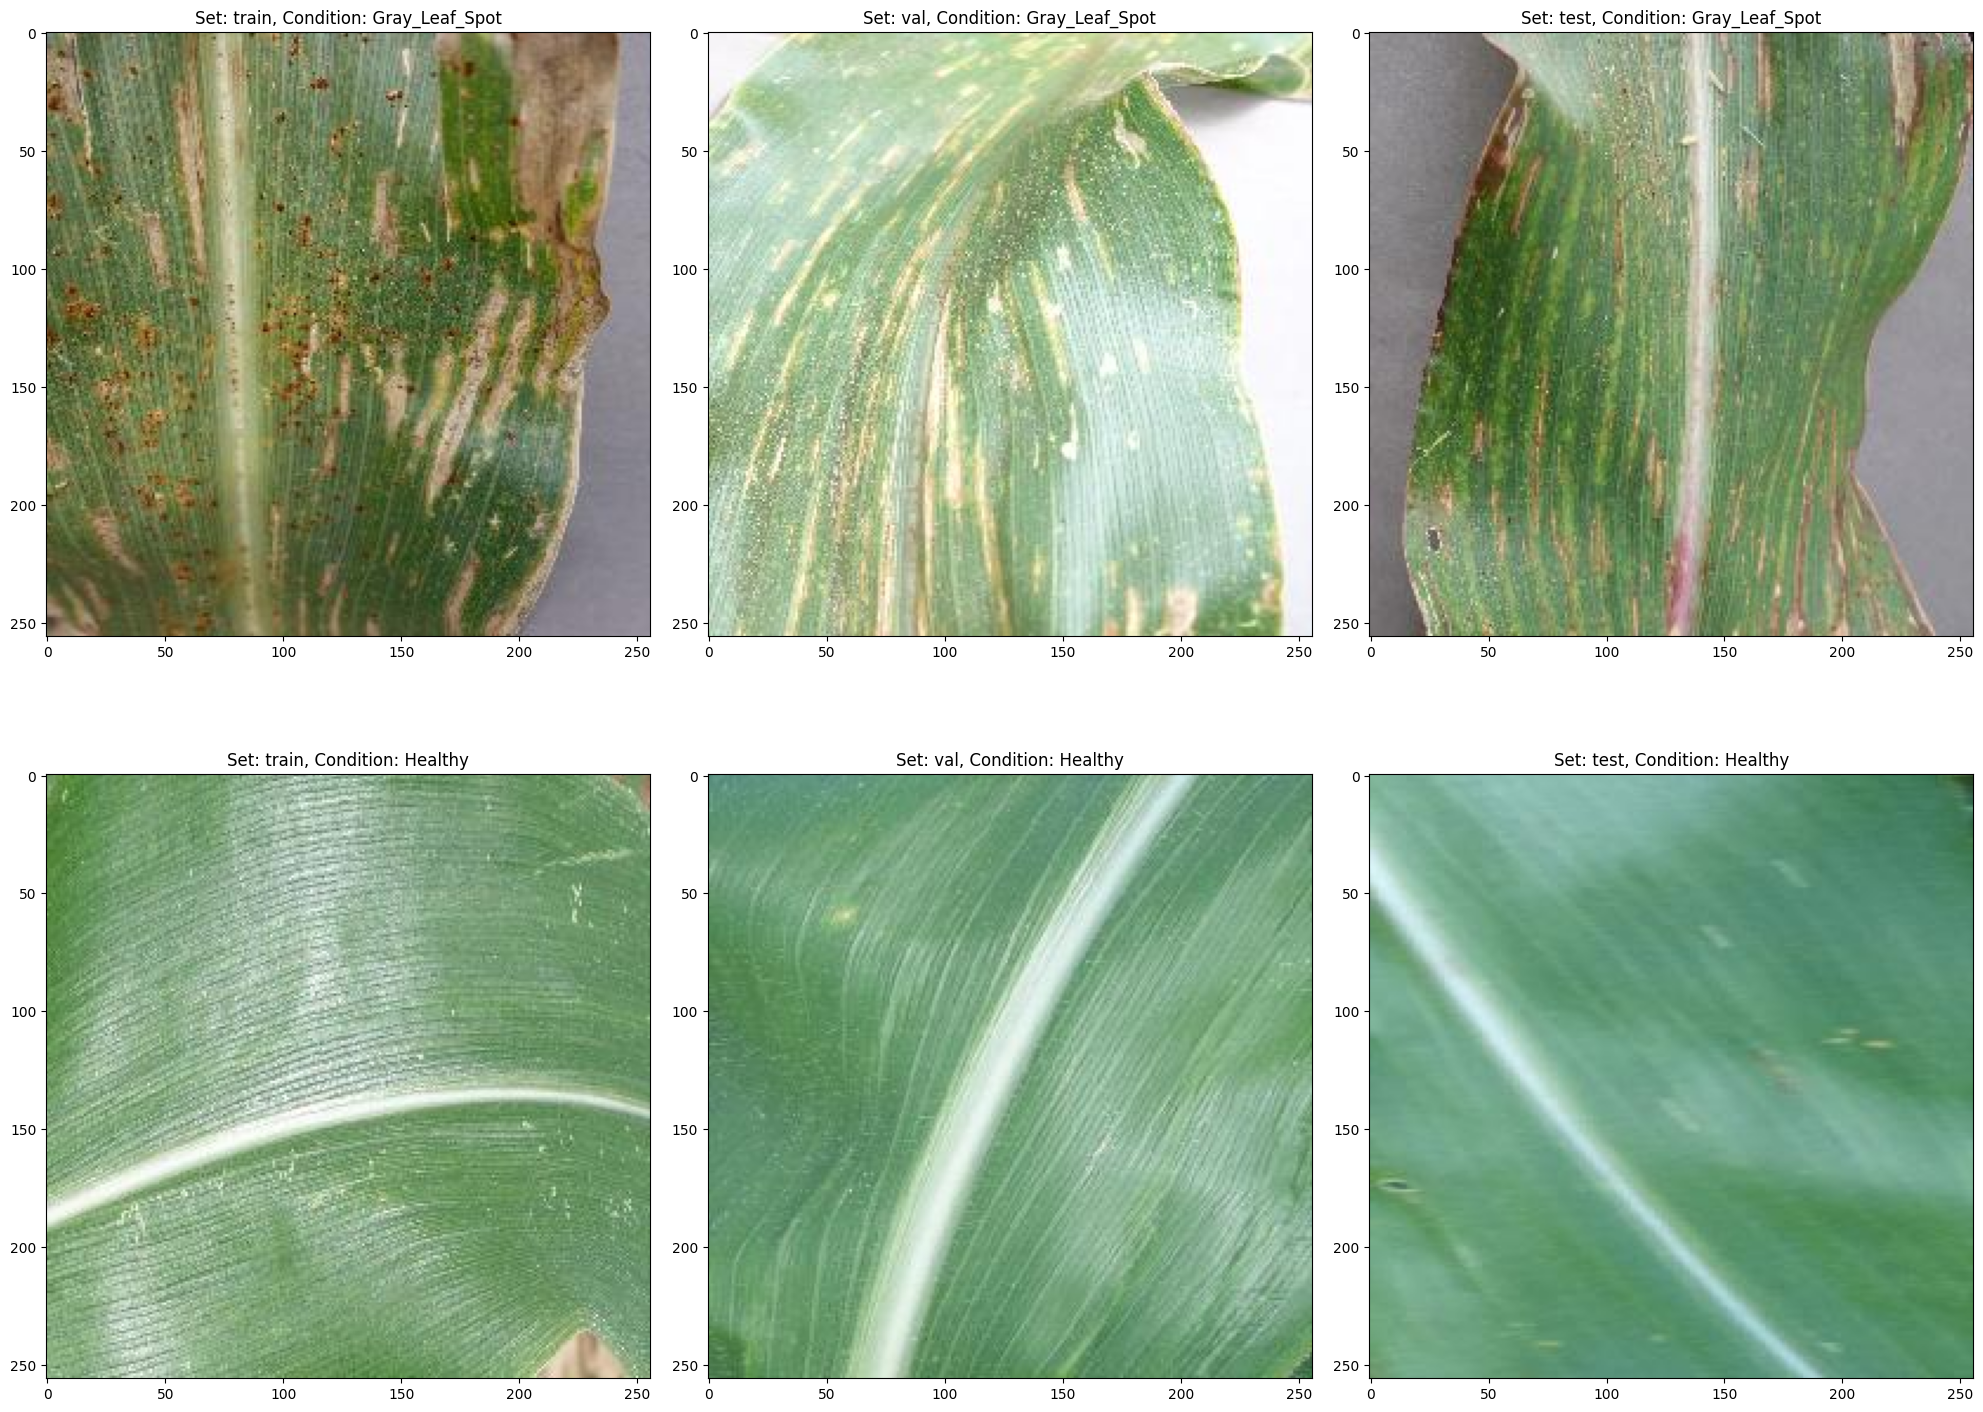

In [30]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()

for i, set_ in enumerate(['train','val','test']):
    set_path = path_+ set_
    ax[i].imshow(plt.imread(set_path+'/Gray_Leaf_Spot/'+os.listdir(set_path+'/Gray_Leaf_Spot')[0]))
    ax[i].set_title('Set: {}, Condition: Gray_Leaf_Spot'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Healthy/'+os.listdir(set_path+'/Healthy')[0]))
    ax[i+3].set_title('Set: {}, Condition: Healthy'.format(set_))

## **Data preprocessing**

- Split data into train and test set
- Data normalization[0,1]
- Data augmentation using saveral techniques such as:
  - image flipping
  - zoom
  - shear
  - width and height shift
  - image rotation
  - Image brightness range
  - Featurewise center
  - Featurewise std normalization
  
Note: the techniques of data augmentation were implemented using ImageDataGenerator from Keras.

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_val_test_data(img_dims, batch_size):

  ## Training data
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 40,
                                       width_shift_range = .2,
                                       height_shift_range = .2,
                                       shear_range = .2,
                                       zoom_range = 0.3,
                                       horizontal_flip = True,
                                       vertical_flip=True,
                                       brightness_range=[0.5, 1.5],
                                       featurewise_center=True,
                                       featurewise_std_normalization=True,
                                       fill_mode = 'nearest',
                                   )


  ## Train generator
  train_gen = train_datagen.flow_from_directory(directory = path_ + 'train',
                                                  target_size = (img_dims, img_dims),
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical',
                                                  shuffle = True)
  ## Validation Data

  validation_datagen = ImageDataGenerator(rescale = 1./255)
  ## validation generator

  val_gen = validation_datagen.flow_from_directory(directory = path_ + 'val',
                                                      target_size = (img_dims, img_dims),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical',
                                                      shuffle = True)



  return train_gen, val_gen

In [34]:
img_dims = 224
batch_size = 128

train_gen, val_gen = train_val_test_data(img_dims, batch_size)

Found 3082 images belonging to 4 classes.
Found 385 images belonging to 4 classes.


## **Modeling**

- Transfer learning (MobileNetV2 architecture)
- Fine-tuning


### **Transfer learning**
- Import MobileNetV2 model pretrained with imaginet dataset
- Freezing all layers from MobileNetV2 model
- Built a model with new top layers to classify 4 classes instead of 1000
- Training:
  - Epochs = 50
  - Adam optimizer with a 0.0001 base learning rate
- Model performance

In [36]:
import tensorflow as tf

## Choose a device type (CPU or GPU)
devices = tf.config.list_physical_devices('GPU')
print(devices[0])

## Name divice
name_gpu = "GPU:0"

## Define my strategy like One Device Strategy
strategy = tf.distribute.OneDeviceStrategy(device=name_gpu)

IndexError: list index out of range